In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

### Importing the dataset

In [32]:
#read train and test files
train_file = pd.read_csv('emnist-letters-train.csv')
test_file = pd.read_csv('emnist-letters-test.csv')

### Data Checking

In [33]:
#view first 5 records of train_file
train_file.head()

,23,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.406,0.407,0.408,0.409,0.410,0.411,0.412,0.413,0.414,0.415
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
test_file.head()

,1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.548,0.549,0.550,0.551,0.552,0.553,0.554,0.555,0.556,0.557
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Data Preprocessing

In [35]:
#rename first column as label for both test and train set
train_file.rename(columns={'23':'label'}, inplace=True)
test_file.rename(columns={'1':'label'}, inplace=True)

#check train data
train_file.head()

,label,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.406,0.407,0.408,0.409,0.410,0.411,0.412,0.413,0.414,0.415
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
#check train data
test_file.head()

,label,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.548,0.549,0.550,0.551,0.552,0.553,0.554,0.555,0.556,0.557
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
#list of all digits that are going to be predicted
np.sort(train_file.label.unique())
train_file.head()

,label,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.406,0.407,0.408,0.409,0.410,0.411,0.412,0.413,0.414,0.415
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Splitting the training dataset into training and validation sets 

In [38]:
#define the number of samples for training set and for validation set
num_train,num_validation = int(len(train_file)*0.9),int(len(train_file)*0.1)
num_train,num_validation

(79919, 8879)

In [39]:
#generate training data from train_file
x_train,y_train=train_file.iloc[:num_train,1:].values,train_file.iloc[:num_train,0].values

In [40]:
x_validation,y_validation=train_file.iloc[num_train:,1:].values,train_file.iloc[num_train:,0].values

In [41]:
print(x_train.shape)
print(y_train.shape)
print(x_validation.shape)
print(y_validation.shape)

(79919, 784)
(79919,)
(8880, 784)
(8880,)


Label: 22 as v


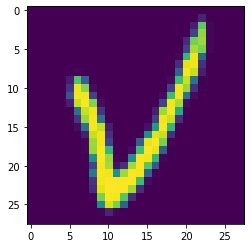

In [42]:
#28 ,28 stands for height and width
index=7
alphabet=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 
          'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

print("Label: " + str(y_train[index]) + ' as ' + alphabet[(y_train[index])-1])

#image fixing
image= x_train[index]
image = image.reshape([28, 28])
image = np.fliplr(image)
image = np.rot90(image)
plt.imshow(image)

## Training the Decision Tree model on the Training set

In [44]:
#fit a Decision Tree Classifier
clf=DecisionTreeClassifier(criterion='entropy',max_depth=14,random_state=33)
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=33)

## Predicting the Validation set results


In [45]:
#predict value of label using classifier
prediction_validation = clf.predict(x_validation)

In [46]:
print("Validation Accuracy: " + str(accuracy_score(y_validation,prediction_validation)))

Validation Accuracy: 0.07454954954954955


Predicted 19 as s


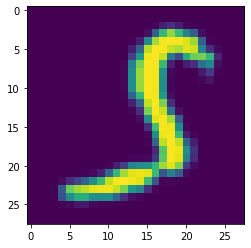

In [22]:
index=1001
alphabet=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 
          'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
print("Predicted " + str(y_validation[y_validation==prediction_validation][index]) + " as " + 
    alphabet[(y_validation[y_validation==prediction_validation][index])-1])

#image fixing
image= x_validation[y_validation==prediction_validation][index]
image = image.reshape([28, 28])
image = np.fliplr(image)
image = np.rot90(image)
plt.imshow(image)

## Making The Confusion Matrix For Validation set

In [23]:
print("Validation Confusion Matrix: \n" + str(confusion_matrix(y_validation,prediction_validation)))

Validation Confusion Matrix: 
[[206   2   6   5   2   2   7  17   0   1   6   0   9   8  14   1  19   9
    2   4   5   0   3   2   0   3]
 [ 10 210   1  17   9   3  10   9   4   0   3   4   0   2   6   2   4   6
    6   1   1   0   2   2   2   1]
 [  2   2 303   1  12   5   3   0   0   1   2   7   0   1   4   3   3   2
    0   2   2   0   0   1   0   5]
 [  3  10   3 211   1   1   5   7   5   9   2   4   1   3  15   3   1   1
    5   3   5   5   5   2   3   4]
 [  8   5  13   1 256   2   7   1   2   0   3   2   2   2   1   6   2   7
    5   6   5   1   1   0   0   6]
 [  2   1   1   3   4 220   7   7   6   3   5   3   1   2   0  24   7  10
    2  19   1   1   2   3   2   4]
 [ 13   8   9   3   8   7 164   3   2   8   0   2   0   0   5   5  45   7
   13   4   4   1   0   2   3   4]
 [ 11   5   1   2   4   3   1 257   3   0  12   7   8  11   1   1   3   4
    0   3   4   1   3   3   1   2]
 [  0   0   1   3   0   2   3   1 252   7   3  58   0   1   1   1   5   3
    5   1   0   0   0   

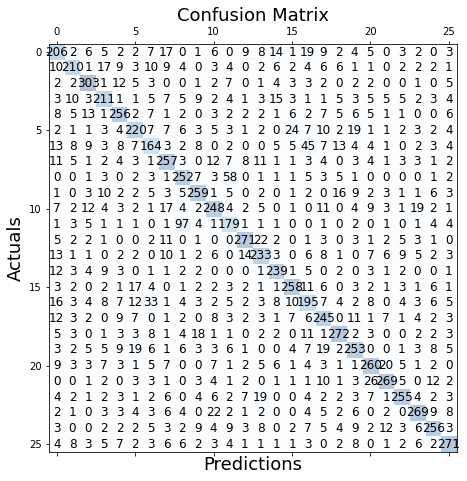

In [24]:
matrix = confusion_matrix(y_validation,prediction_validation)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        ax.text(x=j, y=i,s=matrix[i, j], va='center', ha='center', size='larger')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## Splitting The Test Dataset

In [25]:
y_test = test_file['label']
test_file=test_file.drop("label", axis=1)
x_test = test_file
x_test.shape , y_test.shape

((14799, 784), (14799,))

## Predicting the Test set results

In [26]:
#predict test data
prediction_test = clf.predict(x_test)
prediction_test.shape

(14799,)

In [27]:
print("Validation Accuracy: " + str(accuracy_score(y_test,prediction_test)))

Validation Accuracy: 0.6946415298330968


Predicted b


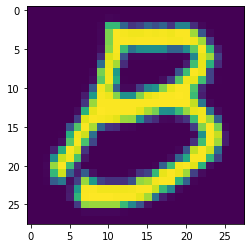

In [28]:
index=1000
alphabet=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 
          'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
print("Predicted " + alphabet[(prediction_test[index])-1])

#image fixing
image= x_test.iloc[index].values
image = image.reshape([28, 28])
image = np.fliplr(image)
image = np.rot90(image)
plt.imshow(image)

## Making The Confusion Matrix For Test set

In [29]:
print("Validation Confusion Matrix: \n" + str(confusion_matrix(y_test,prediction_test)))

Validation Confusion Matrix: 
[[482  10  13   7  11   9  27  30   3   1   7   2  16  34  28  10  38  21
    4   3  17   0   8   9   0   9]
 [ 15 544   8  43  12   5  33  16  11   6   8   7   6   5  13   6   6   7
   11  11   7   1   5   4   4   6]
 [ 19   1 639   4  43  11   7   2   3   2   5  13   2   1  13   3   6  10
    2   4   2   1   3   0   0   4]
 [ 16  38   2 514   1  10   7   8   4  23   8   6   6  12  64   5  12   1
    6   8  13   7   7  10   1  11]
 [ 15   8  41   3 619   2   9   6   2   2  13   3   8   6  12   5  12  11
    3   6   3   0   2   0   1   8]
 [  3   6   1   2  11 555  15   7   7   7  12  12   2   4   3  50  14  17
    6  36   3   6   2   5   9   5]
 [ 32  27  19   8  16  17 395  13   4  13   8   8   3   3   9  12 125  10
   36   8   2   4   2   3  16   7]
 [ 28  23   2  10   1   4   5 569   5   1  31  15   9  35   2   2   5   4
    0   9  13   2  10   8   2   5]
 [  1   5   2   9   1   6   5   5 563  13   2 129   0   0   1   8   2   7
    7  11   2   0   0   

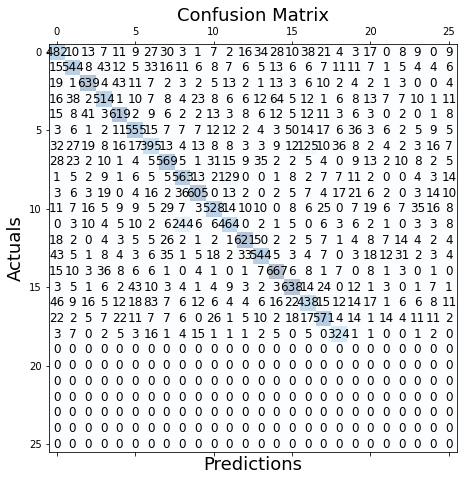

In [30]:
matrix = confusion_matrix(y_test,prediction_test)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        ax.text(x=j, y=i,s=matrix[i, j], va='center', ha='center', size='larger')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()